In [1]:
library(tidyverse)
library(readxl)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
genotypes=list("WT14"="WT", "D14"="Δdek1","#1.14"="oex1", "LO14"="dek1Δloop","LG14"="dek1Δlg3")
genotypes

$WT14
[1] "WT"

$D14
[1] "Δdek1"

$`#1.14`
[1] "oex1"

$LO14
[1] "dek1Δloop"

$LG14
[1] "dek1Δlg3"

In [3]:
genotypes[["WT14"]]

[1] "WT"

In [4]:
d=read_xlsx("quantification.buds_and_branches.xlsx",sheet = "nr of buds per ..fil") %>% 
    mutate(filament=row_number()) %>% 
    pivot_longer(!filament,values_to = "nbuds",names_to="genotype") %>%
    rowwise() %>% mutate(genotype=factor(genotypes[[genotype]],levels=genotypes))
d %>% head()

filament,genotype,nbuds
<int>,<fct>,<dbl>
1,WT,1
1,Δdek1,3
1,dek1Δloop,2
1,dek1Δlg3,1
1,oex1,1
2,WT,1


In [5]:
se <- function(x){sd(x)/sqrt(length(x))}
D=d %>% group_by(genotype) %>% summarise(mean_nbuds=mean(nbuds), se_nbuds=se(nbuds))
D

genotype,mean_nbuds,se_nbuds
<fct>,<dbl>,<dbl>
WT,1.03,0.01714466
Δdek1,3.58,0.08309663
oex1,1.00,0.00000000
dek1Δloop,1.68,0.06337319
dek1Δlg3,1.00,0.00000000


png 
  2

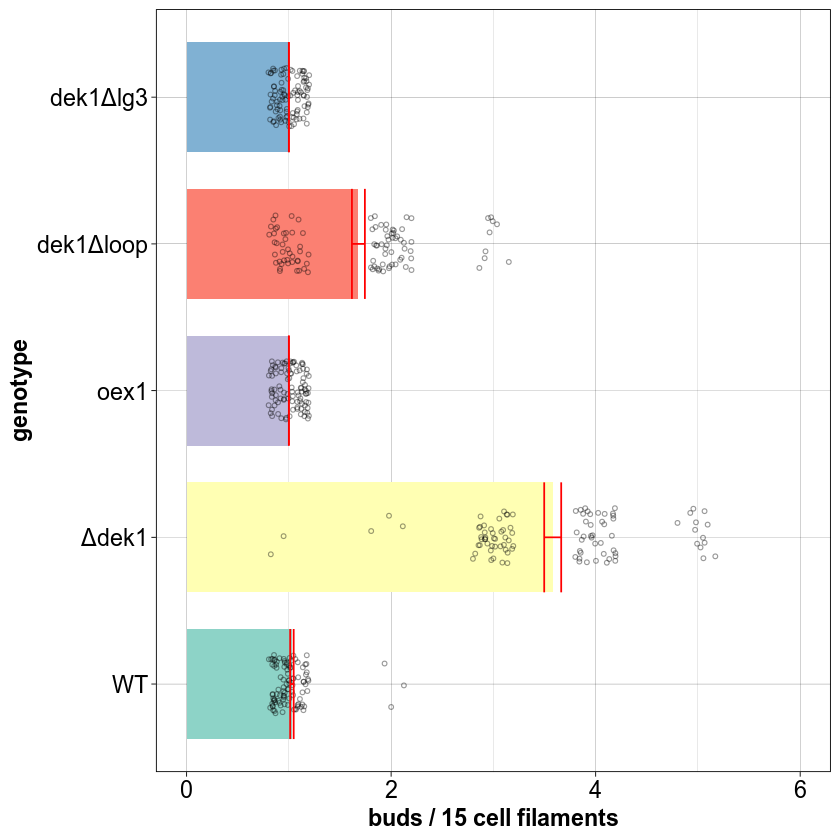

In [6]:
g= ggplot() +
    geom_bar(data=D,aes(x=genotype,y=mean_nbuds,fill=genotype), stat="identity", width=0.75,show.legend = FALSE) + 
    geom_point(data=d,aes(x=genotype,y=nbuds), position=position_jitter(h=0.2, w=0.2),
             shape = 21, alpha = 0.4, size = 1) + 
    geom_errorbar(data=D,aes(x=genotype,  ymin = mean_nbuds - se_nbuds,
                        ymax = mean_nbuds + se_nbuds), stat="identity", width=0.75,color="red") +
    scale_fill_brewer(palette="Set3") + theme_linedraw() + theme(axis.text=element_text(size=14), axis.title=element_text(size=14,face="bold")) +
    coord_flip() +
    ylab("buds / 15 cell filaments") + ylim(0,6)
g
grDevices::cairo_pdf("buds_per_filament.pdf",width=4,height=3)
g
dev.off()

In [7]:
d2=read_xlsx("quantification.buds_and_branches.xlsx",sheet = "%of filaments w buds",range="D1:H101" ) %>% 
    mutate(filament=row_number()) %>% 
    pivot_longer(!filament,values_to = "with_buds",names_to="genotype") %>%
    mutate(with_buds=factor(with_buds==1)) %>%
    rowwise() %>% mutate(genotype=factor(genotypes[[genotype]],levels=genotypes)) %>% 
    group_by(genotype,with_buds) %>% 
    summarise(count=n()) %>%
    mutate(perc=count/sum(count)*100)
d2

`summarise()` has grouped output by 'genotype'. You can override using the `.groups` argument.


genotype,with_buds,count,perc
<fct>,<fct>,<int>,<dbl>
WT,FALSE,45,45
WT,TRUE,55,55
Δdek1,FALSE,3,3
Δdek1,TRUE,97,97
oex1,FALSE,94,94
oex1,TRUE,6,6
dek1Δloop,FALSE,30,30
dek1Δloop,TRUE,70,70
dek1Δlg3,FALSE,75,75


Warning message:
“Using alpha for a discrete variable is not advised.”


png 
  2

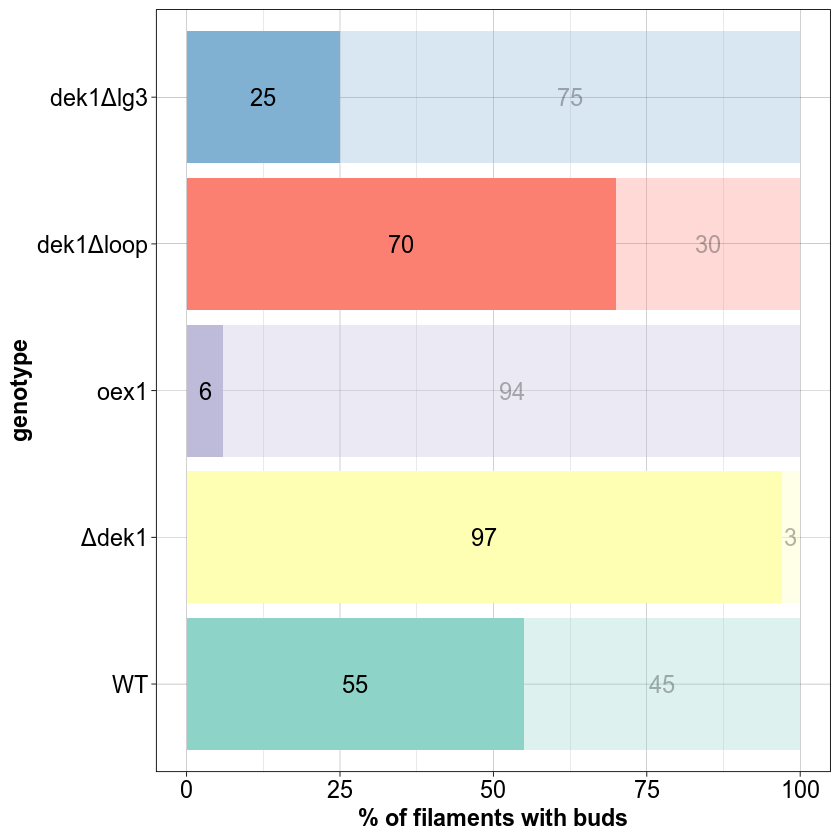

In [8]:
g=d2%>% ggplot(aes(x=genotype, y=perc,fill=genotype,alpha=with_buds,label=count),show.legend = FALSE) + 
    geom_bar(position="stack",stat="identity",show.legend = FALSE)  + 
    scale_fill_brewer(palette="Set3") + 
    scale_alpha_discrete(range = c(0.3, 1)) +
    theme_linedraw() +
    ylab("% of filaments with buds") +
    geom_text(size = 5, position = position_stack(vjust = 0.5),,show.legend = FALSE) +
    theme(axis.text=element_text(size=14), axis.title=element_text(size=14,face="bold")) +
    coord_flip()
g
grDevices::cairo_pdf("percent_filaments_with_buds.pdf",width=4,height=3)
g
dev.off()